In [1]:
import pandas as pd
import numpy as np
import copy
%matplotlib inline

In [2]:
compas = pd.read_csv('C:/Users/sjaco/OneDrive/Desktop/final project/compas.csv')

In [3]:
compas.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,9/16/1984,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,9/16/1984,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


In [4]:
print(compas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60843 entries, 0 to 60842
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person_ID                60843 non-null  int64  
 1   AssessmentID             60843 non-null  int64  
 2   Case_ID                  60843 non-null  int64  
 3   Agency_Text              60843 non-null  object 
 4   LastName                 60843 non-null  object 
 5   FirstName                60843 non-null  object 
 6   MiddleName               15648 non-null  object 
 7   Sex_Code_Text            60843 non-null  object 
 8   Ethnic_Code_Text         60843 non-null  object 
 9   DateOfBirth              60843 non-null  object 
 10  ScaleSet_ID              60843 non-null  int64  
 11  ScaleSet                 60843 non-null  object 
 12  AssessmentReason         60843 non-null  object 
 13  Language                 60843 non-null  object 
 14  LegalStatus           

In [5]:
cat_compas = compas.select_dtypes(include=['object']).copy()

In [6]:
cat_compas.head()

,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevelText,DisplayText,ScoreText,AssessmentType
0,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,Low,Risk of Violence,Low,New
1,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,Low,Risk of Recidivism,Low,New
2,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,Low,Risk of Failure to Appear,Low,New
3,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,9/16/1984,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/2013 0:00,Low,Risk of Violence,Low,New
4,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,9/16/1984,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/2013 0:00,Low,Risk of Recidivism,Low,New


In [7]:
print(cat_compas.isnull().values.sum())

45240


In [8]:
print(cat_compas.isnull().sum())

Agency_Text                    0
LastName                       0
FirstName                      0
MiddleName                 45195
Sex_Code_Text                  0
Ethnic_Code_Text               0
DateOfBirth                    0
ScaleSet                       0
AssessmentReason               0
Language                       0
LegalStatus                    0
CustodyStatus                  0
MaritalStatus                  0
Screening_Date                 0
RecSupervisionLevelText        0
DisplayText                    0
ScoreText                     45
AssessmentType                 0
dtype: int64


In [9]:
#MiddleName is the most incomplete and has enough NULL values that I think it's better just to drop it completely

In [13]:
del cat_compas['MiddleName']

In [14]:
cat_compas.head()

,Agency_Text,LastName,FirstName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevelText,DisplayText,ScoreText,AssessmentType
0,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,Low,Risk of Violence,Low,New
1,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,Low,Risk of Recidivism,Low,New
2,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,Low,Risk of Failure to Appear,Low,New
3,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,9/16/1984,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/2013 0:00,Low,Risk of Violence,Low,New
4,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,9/16/1984,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/2013 0:00,Low,Risk of Recidivism,Low,New


In [15]:
cat_compas = cat_compas.fillna(cat_compas['ScoreText'].value_counts().index[0])

In [16]:
print(cat_compas.isnull().values.sum())

0


In [17]:
#no NULL values left so now we can move on 

In [18]:
print(cat_compas['Ethnic_Code_Text'].value_counts())

African-American    27018
Caucasian           21783
Hispanic             8742
Other                2592
Asian                 324
Native American       219
Arabic                 75
African-Am             51
Oriental               39
Name: Ethnic_Code_Text, dtype: int64


In [19]:
#combine "African-American" and "African-Am", also "Asian" and "Oriental" -problematic yeesh

In [26]:
def race (series): 
    if series == "African-American":
        return 0
    if series == "Caucasian": 
        return 1
    if series == "Hispanic":
        return 2
    if series == "Other":
        return 3
    if series == "Asian":
        return 4
    if series == "Native American":
        return 5
    if series == "Arabic":
        return 6
    if series == "African-Am":
        return 0
    if series == "Oriental":
        return 4
    
cat_compas['Ethnic_Code_TextR'] = cat_compas['Ethnic_Code_Text'].apply(race)

In [27]:
print(cat_compas['Ethnic_Code_TextR'].value_counts())

0    27069
1    21783
2     8742
3     2592
4      363
5      219
6       75
Name: Ethnic_Code_TextR, dtype: int64


In [28]:
cat_compas.head()

,Agency_Text,LastName,FirstName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevelText,DisplayText,ScoreText,AssessmentType,Ethnic_Code_TextR
0,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,Low,Risk of Violence,Low,New,1
1,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,Low,Risk of Recidivism,Low,New,1
2,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,Low,Risk of Failure to Appear,Low,New,1
3,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,9/16/1984,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/2013 0:00,Low,Risk of Violence,Low,New,1
4,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,9/16/1984,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/2013 0:00,Low,Risk of Recidivism,Low,New,1


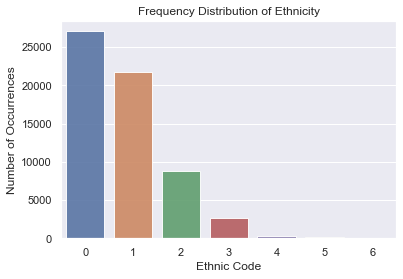

In [29]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
ethnicity_count = cat_compas['Ethnic_Code_TextR'].value_counts()
sns.set(style="darkgrid")
sns.barplot(ethnicity_count.index, ethnicity_count.values, alpha=0.9)
plt.title('Frequency Distribution of Ethnicity')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Ethnic Code', fontsize=12)
plt.show()

In [30]:
#If nothing else we can see that African Americans are arrested far more frequently than the other races classified in this dataset.

In [42]:
#recode the rest of the columns

In [33]:
print(cat_compas['Language'].value_counts())

English    60591
Spanish      252
Name: Language, dtype: int64


In [34]:
def language (series): 
    if series == "English":
        return 0
    if series == "Spanish": 
        return 1
cat_compas['LanguageR'] = cat_compas['Language'].apply(language)

In [35]:
print(cat_compas['LegalStatus'].value_counts())

Pretrial               37578
Post Sentence          18333
Other                   4356
Conditional Release      420
Probation Violator       126
Parole Violator           18
Deferred Sentencing       12
Name: LegalStatus, dtype: int64


In [49]:
def status (series): 
    if series == "Pretrial":
        return 0
    if series == "Post Sentence": 
        return 1
    if series == "Other":
        return 2
    if series == "Conditional Release":
        return 3
    if series == "Probation Violator":
        return 4
    if series == "Parole Violator":
        return 5
    if series == "Deferred Sentencing":
        return 6
cat_compas['LegalStatusR'] = cat_compas['LegalStatus'].apply(status)

In [50]:
print(cat_compas['CustodyStatus'].value_counts())

Jail Inmate            30129
Probation              22968
Pretrial Defendant      7644
Residential Program       66
Parole                    21
Prison Inmate             15
Name: CustodyStatus, dtype: int64


In [51]:
def cust (series): 
    if series == "Jail Inmate":
        return 0
    if series == "Probation": 
        return 1
    if series == "Pretrial Defendant":
        return 2
    if series == "Residential Program":
        return 3
    if series == "Parole":
        return 4
    if series == "Prison Inmate":
        return 5
cat_compas['CustodyStatusR'] = cat_compas['CustodyStatus'].apply(cust)

In [52]:
print(cat_compas['MaritalStatus'].value_counts())

Single               45126
Married               8172
Divorced              3879
Separated             1803
Significant Other     1260
Widowed                390
Unknown                213
Name: MaritalStatus, dtype: int64


In [53]:
def love (series): 
    if series == "Single":
        return 0
    if series == "Married": 
        return 1
    if series == "Divorced":
        return 2
    if series == "Separated":
        return 3
    if series == "Significant Other":
        return 4
    if series == "Widowed":
        return 5
    if series == "Unknown":
        return 6
cat_compas['MaritalStatusR'] = cat_compas['MaritalStatus'].apply(love)

In [54]:
print(cat_compas['RecSupervisionLevelText'].value_counts())

Low                                   38472
Medium                                10476
Medium with Override Consideration     7827
High                                   4068
Name: RecSupervisionLevelText, dtype: int64


In [56]:
print(cat_compas.dtypes)

Agency_Text                object
LastName                   object
FirstName                  object
Sex_Code_Text              object
Ethnic_Code_Text           object
DateOfBirth                object
ScaleSet                   object
AssessmentReason           object
Language                   object
LegalStatus                object
CustodyStatus              object
MaritalStatus              object
Screening_Date             object
RecSupervisionLevelText    object
DisplayText                object
ScoreText                  object
AssessmentType             object
Ethnic_Code_TextR           int64
LanguageR                   int64
LegalStatusR                int64
CustodyStatusR              int64
MaritalStatusR              int64
dtype: object


In [58]:
cat_compas['Agency_Text'] = cat_compas['Agency_Text'].astype('category')
cat_compas['LastName'] = cat_compas['LastName'].astype('category') 
cat_compas['FirstName'] = cat_compas['FirstName'].astype('category') 
cat_compas['Sex_Code_Text'] = cat_compas['Sex_Code_Text'].astype('category') 
cat_compas['Ethnic_Code_Text'] = cat_compas['Ethnic_Code_Text'].astype('category')
cat_compas['DateOfBirth'] = cat_compas['DateOfBirth'].astype('category') 
cat_compas['ScaleSet'] = cat_compas['ScaleSet'].astype('category') 
cat_compas['AssessmentReason'] = cat_compas['AssessmentReason'].astype('category') 
cat_compas['Language'] = cat_compas['Language'].astype('category')
cat_compas['LegalStatus'] = cat_compas['LegalStatus'].astype('category') 
cat_compas['CustodyStatus'] = cat_compas['CustodyStatus'].astype('category') 
cat_compas['MaritalStatus'] = cat_compas['MaritalStatus'].astype('category') 
cat_compas['Screening_Date'] = cat_compas['Screening_Date'].astype('category')
cat_compas['RecSupervisionLevelText'] = cat_compas['RecSupervisionLevelText'].astype('category') 
cat_compas['DisplayText'] = cat_compas['DisplayText'].astype('category') 
cat_compas['ScoreText'] = cat_compas['ScoreText'].astype('category') 
cat_compas['AssessmentType'] = cat_compas['AssessmentType'].astype('category') 

print(cat_compas.dtypes)

Agency_Text                category
LastName                   category
FirstName                  category
Sex_Code_Text              category
Ethnic_Code_Text           category
DateOfBirth                category
ScaleSet                   category
AssessmentReason           category
Language                   category
LegalStatus                category
CustodyStatus              category
MaritalStatus              category
Screening_Date             category
RecSupervisionLevelText    category
DisplayText                category
ScoreText                  category
AssessmentType             category
Ethnic_Code_TextR             int64
LanguageR                     int64
LegalStatusR                  int64
CustodyStatusR                int64
MaritalStatusR                int64
dtype: object


In [59]:
cat_compas['RecSupervisionLevelText'] = cat_compas['RecSupervisionLevelText'].cat.codes

In [60]:
cat_compas.head()

,Agency_Text,LastName,FirstName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet,AssessmentReason,Language,LegalStatus,...,Screening_Date,RecSupervisionLevelText,DisplayText,ScoreText,AssessmentType,Ethnic_Code_TextR,LanguageR,LegalStatusR,CustodyStatusR,MaritalStatusR
0,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,...,1/1/2013 0:00,1,Risk of Violence,Low,New,1,0,0,0,0
1,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,...,1/1/2013 0:00,1,Risk of Recidivism,Low,New,1,0,0,0,0
2,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,...,1/1/2013 0:00,1,Risk of Failure to Appear,Low,New,1,0,0,0,0
3,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,9/16/1984,Risk and Prescreen,Intake,English,Pretrial,...,1/1/2013 0:00,1,Risk of Violence,Low,New,1,0,0,0,1
4,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,9/16/1984,Risk and Prescreen,Intake,English,Pretrial,...,1/1/2013 0:00,1,Risk of Recidivism,Low,New,1,0,0,0,1


In [62]:
cat_compas_sklearn = cat_compas.copy()

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
cat_compas_sklearn['ScoreText'] = lb_make.fit_transform(cat_compas['ScoreText'])

cat_compas_sklearn.head() #Results in appending a new column to df

,Agency_Text,LastName,FirstName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet,AssessmentReason,Language,LegalStatus,...,Screening_Date,RecSupervisionLevelText,DisplayText,ScoreText,AssessmentType,Ethnic_Code_TextR,LanguageR,LegalStatusR,CustodyStatusR,MaritalStatusR
0,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,...,1/1/2013 0:00,1,Risk of Violence,1,New,1,0,0,0,0
1,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,...,1/1/2013 0:00,1,Risk of Recidivism,1,New,1,0,0,0,0
2,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,...,1/1/2013 0:00,1,Risk of Failure to Appear,1,New,1,0,0,0,0
3,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,9/16/1984,Risk and Prescreen,Intake,English,Pretrial,...,1/1/2013 0:00,1,Risk of Violence,1,New,1,0,0,0,1
4,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,9/16/1984,Risk and Prescreen,Intake,English,Pretrial,...,1/1/2013 0:00,1,Risk of Recidivism,1,New,1,0,0,0,1


In [63]:
#quick encoding for the remaining categories

In [64]:
cat_compas_sklearn['AssessmentType'] = lb_make.fit_transform(cat_compas['AssessmentType'])
cat_compas_sklearn['DisplayText'] = lb_make.fit_transform(cat_compas['DisplayText'])
cat_compas_sklearn['Screening_Date'] = lb_make.fit_transform(cat_compas['Screening_Date'])
cat_compas_sklearn['AssessmentReason'] = lb_make.fit_transform(cat_compas['AssessmentReason'])
cat_compas_sklearn['ScaleSet'] = lb_make.fit_transform(cat_compas['ScaleSet'])
cat_compas_sklearn['LastName'] = lb_make.fit_transform(cat_compas['LastName'])
cat_compas_sklearn['FirstName'] = lb_make.fit_transform(cat_compas['FirstName'])

In [65]:
cat_compas_sklearn.head()

,Agency_Text,LastName,FirstName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet,AssessmentReason,Language,LegalStatus,...,Screening_Date,RecSupervisionLevelText,DisplayText,ScoreText,AssessmentType,Ethnic_Code_TextR,LanguageR,LegalStatusR,CustodyStatusR,MaritalStatusR
0,PRETRIAL,3005,3197,Male,Caucasian,12/5/1992,1,0,English,Pretrial,...,0,1,2,1,1,1,0,0,0,0
1,PRETRIAL,3005,3197,Male,Caucasian,12/5/1992,1,0,English,Pretrial,...,0,1,1,1,1,1,0,0,0,0
2,PRETRIAL,3005,3197,Male,Caucasian,12/5/1992,1,0,English,Pretrial,...,0,1,0,1,1,1,0,0,0,0
3,PRETRIAL,4426,3017,Male,Caucasian,9/16/1984,1,0,English,Pretrial,...,0,1,2,1,1,1,0,0,0,1
4,PRETRIAL,4426,3017,Male,Caucasian,9/16/1984,1,0,English,Pretrial,...,0,1,1,1,1,1,0,0,0,1


In [67]:
cat_compas_sklearn["DateOfBirth"] = pd.to_datetime(cat_compas_sklearn['DateOfBirth'])

In [68]:
cat_compas_sklearn.head()

,Agency_Text,LastName,FirstName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet,AssessmentReason,Language,LegalStatus,...,Screening_Date,RecSupervisionLevelText,DisplayText,ScoreText,AssessmentType,Ethnic_Code_TextR,LanguageR,LegalStatusR,CustodyStatusR,MaritalStatusR
0,PRETRIAL,3005,3197,Male,Caucasian,1992-12-05,1,0,English,Pretrial,...,0,1,2,1,1,1,0,0,0,0
1,PRETRIAL,3005,3197,Male,Caucasian,1992-12-05,1,0,English,Pretrial,...,0,1,1,1,1,1,0,0,0,0
2,PRETRIAL,3005,3197,Male,Caucasian,1992-12-05,1,0,English,Pretrial,...,0,1,0,1,1,1,0,0,0,0
3,PRETRIAL,4426,3017,Male,Caucasian,1984-09-16,1,0,English,Pretrial,...,0,1,2,1,1,1,0,0,0,1
4,PRETRIAL,4426,3017,Male,Caucasian,1984-09-16,1,0,English,Pretrial,...,0,1,1,1,1,1,0,0,0,1


In [71]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from datetime import datetime
from datetime import date

In [76]:
cat_compas_sklearn.shape

(60843, 22)

In [77]:
compas.shape

(60843, 27)

In [79]:
del cat_compas_sklearn['LegalStatus']
del cat_compas_sklearn['Language']
del cat_compas_sklearn['Ethnic_Code_Text']
del cat_compas_sklearn['Sex_Code_Text']
del cat_compas_sklearn['Agency_Text']

In [80]:
cat_compas_sklearn.head()

,LastName,FirstName,DateOfBirth,ScaleSet,AssessmentReason,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevelText,DisplayText,ScoreText,AssessmentType,Ethnic_Code_TextR,LanguageR,LegalStatusR,CustodyStatusR,MaritalStatusR
0,3005,3197,1992-12-05,1,0,Jail Inmate,Single,0,1,2,1,1,1,0,0,0,0
1,3005,3197,1992-12-05,1,0,Jail Inmate,Single,0,1,1,1,1,1,0,0,0,0
2,3005,3197,1992-12-05,1,0,Jail Inmate,Single,0,1,0,1,1,1,0,0,0,0
3,4426,3017,1984-09-16,1,0,Jail Inmate,Married,0,1,2,1,1,1,0,0,0,1
4,4426,3017,1984-09-16,1,0,Jail Inmate,Married,0,1,1,1,1,1,0,0,0,1


In [81]:
del cat_compas_sklearn['CustodyStatus']
del cat_compas_sklearn['MaritalStatus']

In [82]:
cat_compas_sklearn.head()

,LastName,FirstName,DateOfBirth,ScaleSet,AssessmentReason,Screening_Date,RecSupervisionLevelText,DisplayText,ScoreText,AssessmentType,Ethnic_Code_TextR,LanguageR,LegalStatusR,CustodyStatusR,MaritalStatusR
0,3005,3197,1992-12-05,1,0,0,1,2,1,1,1,0,0,0,0
1,3005,3197,1992-12-05,1,0,0,1,1,1,1,1,0,0,0,0
2,3005,3197,1992-12-05,1,0,0,1,0,1,1,1,0,0,0,0
3,4426,3017,1984-09-16,1,0,0,1,2,1,1,1,0,0,0,1
4,4426,3017,1984-09-16,1,0,0,1,1,1,1,1,0,0,0,1


In [83]:
cat_compas_sklearn.shape

(60843, 15)

In [89]:
compas_concat = pd.concat([compas, cat_compas_sklearn], axis=1)

In [90]:
compas_concat.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,...,Screening_Date,RecSupervisionLevelText,DisplayText,ScoreText,AssessmentType,Ethnic_Code_TextR,LanguageR,LegalStatusR,CustodyStatusR,MaritalStatusR
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/5/1992,22,...,0,1,2,1,1,1,0,0,0,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/5/1992,22,...,0,1,1,1,1,1,0,0,0,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/5/1992,22,...,0,1,0,1,1,1,0,0,0,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,9/16/1984,22,...,0,1,2,1,1,1,0,0,0,1
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,9/16/1984,22,...,0,1,1,1,1,1,0,0,0,1


In [91]:
print(compas_concat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60843 entries, 0 to 60842
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Person_ID                60843 non-null  int64   
 1   AssessmentID             60843 non-null  int64   
 2   Case_ID                  60843 non-null  int64   
 3   Agency_Text              60843 non-null  object  
 4   LastName                 60843 non-null  object  
 5   FirstName                60843 non-null  object  
 6   Sex_Code_Text            60843 non-null  object  
 7   Ethnic_Code_Text         60843 non-null  object  
 8   DateOfBirth              60843 non-null  object  
 9   ScaleSet_ID              60843 non-null  int64   
 10  ScaleSet                 60843 non-null  object  
 11  AssessmentReason         60843 non-null  object  
 12  Language                 60843 non-null  object  
 13  LegalStatus              60843 non-null  object  
 14  Custod

In [97]:
del compas_concat['LastName']
del compas_concat['FirstName']
del compas_concat['Language']
del compas_concat['Ethnic_Code_Text']
del compas_concat['Sex_Code_Text']
del compas_concat['Agency_Text']
del compas_concat['ScaleSet']
del compas_concat['AssessmentReason']
del compas_concat['CustodyStatus']
del compas_concat['MaritalStatus']
del compas_concat['Screening_Date']
del compas_concat['RecSupervisionLevelText']
del compas_concat['DisplayText']
del compas_concat['ScoreText']
del compas_concat['AssessmentType']
del compas_concat['LegalStatus']

In [98]:
print(compas_concat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60843 entries, 0 to 60842
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Person_ID            60843 non-null  int64   
 1   AssessmentID         60843 non-null  int64   
 2   Case_ID              60843 non-null  int64   
 3   DateOfBirth          60843 non-null  object  
 4   ScaleSet_ID          60843 non-null  int64   
 5   RecSupervisionLevel  60843 non-null  int64   
 6   Scale_ID             60843 non-null  int64   
 7   RawScore             60843 non-null  float64 
 8   DecileScore          60843 non-null  int64   
 9   IsCompleted          60843 non-null  int64   
 10  IsDeleted            60843 non-null  int64   
 11  DateOfBirth          60843 non-null  category
 12  Ethnic_Code_TextR    60843 non-null  int64   
 13  LanguageR            60843 non-null  int64   
 14  LegalStatusR         60843 non-null  int64   
 15  CustodyStatusR     

In [100]:
compas_concat = compas_concat.loc[:,~compas_concat.columns.duplicated()]

In [101]:
compas_concat["DateOfBirth"] = pd.to_datetime(compas_concat['DateOfBirth'])

In [102]:
print(compas_concat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60843 entries, 0 to 60842
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Person_ID            60843 non-null  int64         
 1   AssessmentID         60843 non-null  int64         
 2   Case_ID              60843 non-null  int64         
 3   DateOfBirth          60843 non-null  datetime64[ns]
 4   ScaleSet_ID          60843 non-null  int64         
 5   RecSupervisionLevel  60843 non-null  int64         
 6   Scale_ID             60843 non-null  int64         
 7   RawScore             60843 non-null  float64       
 8   DecileScore          60843 non-null  int64         
 9   IsCompleted          60843 non-null  int64         
 10  IsDeleted            60843 non-null  int64         
 11  Ethnic_Code_TextR    60843 non-null  int64         
 12  LanguageR            60843 non-null  int64         
 13  LegalStatusR         60843 non-

In [108]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=compas_concat[['Person_ID', 'AssessmentID', 'Case_ID', 'DateOfBirth', 'ScaleSet_ID', 'RecSupervisionLevel', 'Scale_ID', 'RawScore', 'IsCompleted', 'IsDeleted', 'Ethnic_Code_TextR', 'LanguageR', 'LegalStatusR', 'CustodyStatusR', 'MaritalStatusR']]  # Features
y=compas_concat['DecileScore']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [111]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np

In [117]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

TypeError: invalid type promotion